**Kuramoto model - Numerical solution**

In [1]:
import numpy as np

In [2]:
import csv
file = open("numerical.txt", "w")
writer = csv.writer(file)

In [3]:
N = 3
k = 1. # coupling strength

w1 = 10*2*np.pi
w2 = 10*2*np.pi
w3 = 10*2*np.pi
w = np.array([w1, w2, w3])

A = np.array([[0, 1, 1],
              [1, 0, 1],
              [1, 1, 0]]) # adjacency matrix

In [4]:
# Derivative of the function
def derivative(t, theta): # theta = (theta1, theta2, theta3,..., thetaN) [vector]
    dtheta = np.zeros(len(theta))
    dtheta += w
    #print(dtheta)
    #print()
    for i in range(len(theta)): # len(theta) = N
        for j in range(len(theta)):          
                dtheta[i] += k * A[i,j]*np.sin(theta[j]-theta[i]) 
        #print(dtheta[i])
    return dtheta        
                   
def rk4_multivariable(t, h, theta0):
    k1 = derivative(t, theta0)
    k2 = derivative(t, theta0+(h/2.)*k1)
    k3 = derivative(t, theta0+(h/2.)*k2)
    k4 = derivative(t, theta0+h*k3)
    theta = theta0 + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)  
    for i in range(len(theta)):
        #if theta[i] > 2*np.pi:
         #   theta[i] = theta[i] - 2*np.pi
        #if theta[i] < 0:
         #   theta[i] = theta[i] +2*np.pi
            
        if np.pi < theta[i] < 2*np.pi:
            theta[i] = theta[i] - 2*np.pi
        if -np.pi < theta[i] < -2*np.pi:
            theta[i] = theta[i] +2*np.pi
    return theta               

In [5]:
t0 = 0
h = 0.001
steps = 1000
theta0 = np.array([1., -1., 0.5])*np.pi

writer.writerow((t0, theta0[0], theta0[1], theta0[2]))

results = []
theta = np.zeros(N)
time = []

results.append(theta0)
time.append(t0)
for n in range(1, steps):
    t = t0 + n*h
    time.append(t)
    theta = rk4_multivariable(t, h, theta0)
    results.append(theta)
    theta0 = theta
    
    writer.writerow((t, theta0[0], theta0[1], theta0[2]))
file.close()    

In [6]:
print(results[0])

[ 3.14159265 -3.14159265  1.57079633]


In [7]:
print(results[steps-1])

[2.5884255  2.5884255  2.48863508]


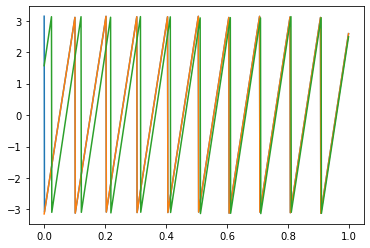

In [8]:
import matplotlib.pyplot as plt
plt.plot(time,results)    
plt.show()